In [1]:
import pandas as pd
from random import randint
from matplotlib import pyplot

# Data sources
#
#   - Inhabitants' median disposable monetary income by postal code area, 2010-2021
#     https://pxdata.stat.fi:443/PxWeb/sq/39625562-d250-492a-a190-37bcc355e2a3
#
#   - Prices per square meter of old dwellings in housing companies and numbers
#     of transactions by postal code area, yearly, 2009-2022
#     https://pxdata.stat.fi:443/PxWeb/sq/41826b15-82a9-4c83-8be6-bd77f98b31ac
#

# Read in what we've got.
incomes = pd.read_csv('data/003_12f1_2021_20230929-100110.csv',
                      encoding = 'latin1',
                      skiprows = [0, 1])
prices = pd.read_csv('data/001_13mu_2022_20230929-105546.csv',
                     encoding = 'latin1',
                     na_values = [ '.', '..', '...' ],
                     skiprows = [0, 1])

In [2]:
# A few peeks in to the data we just read.
print(f'Income/Price data shape: {incomes.shape}/{prices.shape}\n')

print(incomes.iloc[[randint(0, incomes.shape[0])]].to_string())
print(prices.iloc[[randint(0, prices.shape[0])]].to_string())

Income/Price data shape: (84, 14)/(81, 17)

                    Postal code area                        Information   2010   2011   2012   2013   2014   2015   2016   2017   2018   2019   2020   2021
59  00750  Tapulikaupunki (Helsinki)  Median income of inhabitants (HR)  20622  21135  21947  22155  22085  22208  22483  22711  23262  24091  24004  24463
                            Postal code                   Building type                      Information    2009    2010    2011    2012    2013    2014    2015    2016    2017    2018    2019    2020    2021    2022
33  00500  Sörnäinen - Harju (Helsinki)  Blocks of flats, two-room flat  Price per square meter (EUR/m2)  3392.0  3909.0  4094.0  4272.0  4528.0  4700.0  4862.0  5155.0  5335.0  5682.0  5921.0  6200.0  6559.0  6513.0


In [3]:
# Drop unwanted columns for ease of use later on.
incomes.drop('Information', axis = 1, inplace = True)
prices.drop([ 'Building type', 'Information' ], axis = 1, inplace = True)

# Since we do not have income data for years 2009 and 2022, we don't need pricing data for those either.
prices.drop([ '2009', '2022' ], axis = 1, inplace = True)

# Ensure column names aren't fluctuating wildly like a warp drive engine.
incomes.rename(columns = { 'Postal code area': 'Postal code' }, inplace = True)

Income/Price data shape: (84, 13)/(81, 13)

                     Postal code   2010   2011   2012   2013   2014   2015  \
66  00820  Roihuvuori (Helsinki)  18389  18835  19390  19628  19809  20133   

     2016   2017   2018   2019   2020   2021  
66  20510  21169  21920  22575  23046  23903  
                     Postal code    2010    2011    2012    2013    2014  \
65  00820  Roihuvuori (Helsinki)  2628.0  2751.0  2868.0  2947.0  2971.0   

      2015    2016    2017    2018    2019    2020    2021  
65  2942.0  3027.0  3238.0  3472.0  3724.0  3861.0  4557.0  


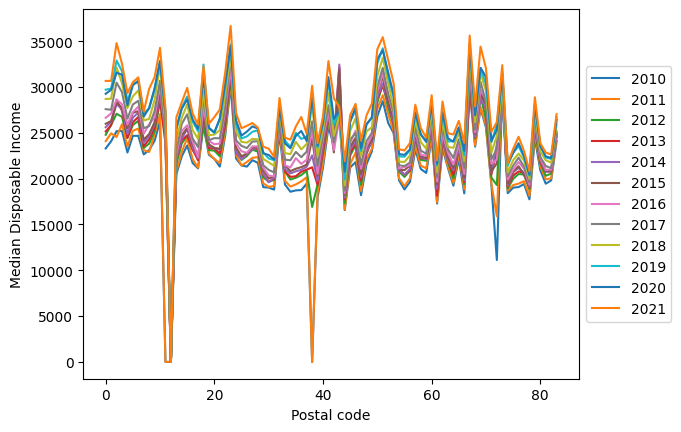

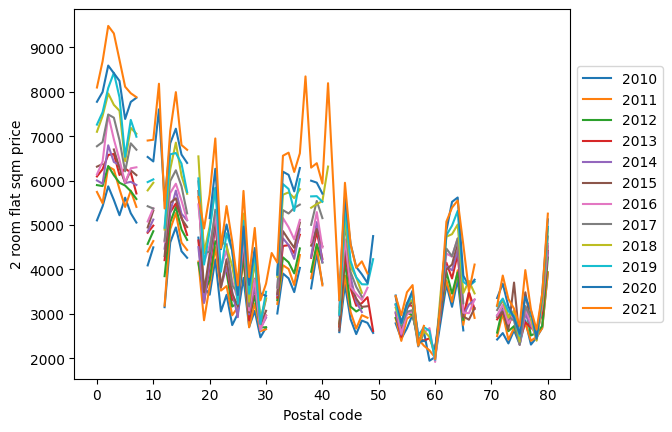

In [4]:
# A few more peeks into the data, which should now appear more uniform than before.

print(f'Income/Price data shape: {incomes.shape}/{prices.shape}\n')

code = incomes.iloc[[randint(0, min(incomes.shape[0], prices.shape[0]))]]['Postal code'].values[0]
print(incomes.loc[incomes['Postal code'] == code])
print(prices.loc[prices['Postal code'] == code])

ax_incomes = incomes.plot()
ax_incomes.set_xlabel('Postal code')
ax_incomes.set_ylabel('Median Disposable Income')
ax_incomes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax_prices = prices.plot()
ax_prices.set_xlabel('Postal code')
ax_prices.set_ylabel('2 room flat sqm price')
ax_prices.legend(loc='center left', bbox_to_anchor=(1, 0.5))
